# 线性模型

## 用于分类的线性模型
---
线性模型也广泛应用于分类问题。我们首先来看二分类。这时可以利用下面的公式进行预测：

ŷ = w[0] * x[0] + w[1] * x[1] + …+ w[p] * x[p] + b > 0

这个公式看起来与线性回归的公式非常相似，但我们没有返回特征的加权求和，而是为预测设置了阈值（0）。如果函数值小于0，我们就预测类别-1；如果函数值大于0，我们就预测类别+1。对于所有用于分类的线性模型，这个预测规则都是通用的。同样，有很多种不同的方法来找出系数（w）和截距（b）。

对于用于回归的线性模型，输出ŷ是特征的线性函数，是直线、平面或超平面（对于更高维的数据集）。对于用于分类的线性模型，决策边界是输入的线性函数。换句话说（二元）线性分类器是利用直线、平面或超平面来分开两个类别的分类器。本节我们将看到这方面的例子。

学习线性模型有很多种算法。这些算法的区别在于以下两点：
* 系数和截距的特定组合对训练数据拟合好坏的度量方法；
* 是否使用正则化，以及使用哪种正则化方法。

不同的算法使用不同的方法来度量“对训练集拟合好坏”。由于数学上的技术原因，不可能调节w和b使得算法产生的误分类数量最少。对于我们的目的，以及对于许多应用而言，上面第一点（称为损失函数）的选择并不重要。

最常见的两种线性分类算法：
* Logistic回归（LR），在linear_model.LogisticRegression中实现。虽然LogisticRegression的名字中含有回归（regression）， 但它是一种分类算法，并不是回归算法， 不应与LinearRegression混淆。
* 线性支持向量机（线性SVM），在svm.LinearSVC（SVC代表支持向量分类器）中实现。

我们将LogisticRegression和LinearSVC模型应用到forge数据集上，并将线性模型找到的决策边界可视化：

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import seaborn as sns
sns.set(style = "white")

import warnings
warnings = warnings.filterwarnings("ignore")

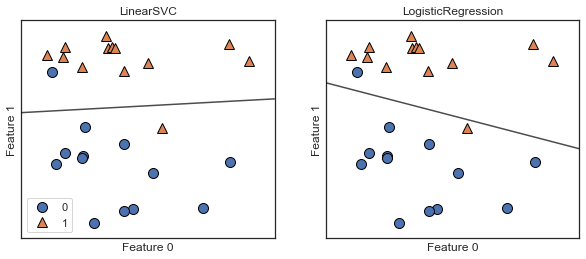

In [3]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, 
                                    eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

上图中，forge数据集的第一个特征位于x轴，第二个特征位于y轴，图中分别展示了LinearSVC和LogisticRegression得到的决策边界，都是直线，将顶部归为类别1的区域和底部归为类别0的区域分开了。换句话说，对于每个分类器而言，位于黑线上方的新数据点都会被划为类别1，而在黑线下方的点都会被划为类别0。两个模型得到了相似的决策边界。注意！！！两个模型中都有两个点的分类是错误的。两个模型都默认使用L2正则化，就像Ridge对回归所做的那样。

对于LogisticRegression和LinearSVC，决定正则化强度的权衡参数叫作C。C值越大，对应的正则化越弱。换句话说，如果参数C值较大，那么LogisticRegression和LinearSVC将尽可能将训练集拟合到最好，而如果C值较小，那么模型更强调使系数向量(w)接近于0。参数C的作用还有另一个有趣之处，较小的C值可以让算法尽量适应“大多数”数据点，而较大的C值更强调每个数据点都分类正确的重要性。

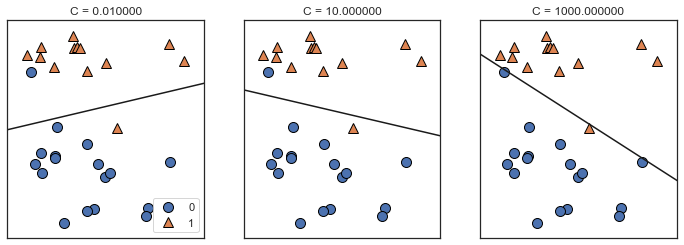

In [4]:
mglearn.plots.plot_linear_svc_regularization()

在左侧的图中，C值很小，对应强正则化。大部分属于类别0的点都位于底部，大部分属于类别1的点都位于顶部。强正则化的模型会选择一条相对水平的线，有两个点分类错误。在中间的图中，C值稍大，模型更关注两个分类错误的样本，使决策边界的斜率变大。最后，在右侧的图中，模型的C值非常大，使得决策边界的斜率也很大，现在模型对类别0中所有点的分类都是正确的。类别1中仍有一个点分类错误，这是因为对这个数据集来说，不可能用一条直线将所有点都分类正确。右侧图中的模型尽量使所有点的分类都正确，但可能无法掌握类别的整体分布。换句话说，这个模型很可能过拟合。与回归的情况类似，用于分类的线性模型在低维空间中看起来可能非常受限，决策边界只能是直线或平面。同样，在高维空间中，用于分类的线性模型变得非常强大，当考虑更多特征时，避免过拟合变得越来越重要。

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver = "liblinear").fit(X_train, y_train)
print("Training set score: {:.4f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg.score(X_test, y_test)))

Training set score: 0.9531
Test set score: 0.9580


参数C的默认值1，给出了相当好的性能，在训练集和测试集的精度都在95%左右。但由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。

In [24]:
# 增大C来拟合一个更灵活的模型：
logreg100 = LogisticRegression(solver = "liblinear", C = 100).fit(X_train, y_train)
print("Training set score: {:.4f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.9718
Test set score: 0.9650


使用C=100可以得到更高的训练集精度，测试集精度也有一定提高，这也证实了我们的直觉，即更复杂的模型应该性能更好。

In [25]:
# C=0.01时模型精度：
logreg001 = LogisticRegression(solver = "liblinear", C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


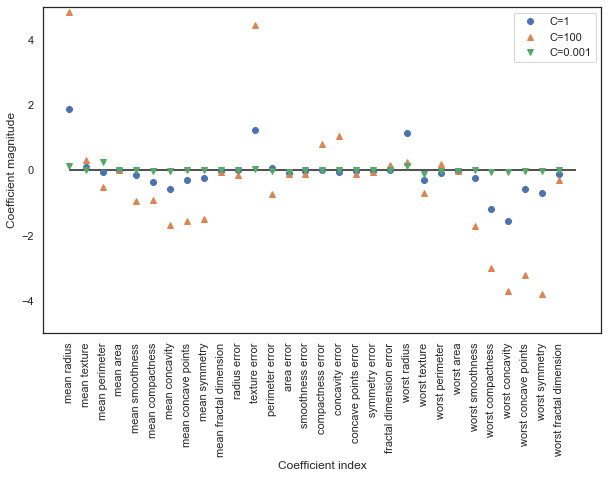

In [27]:
# 正则化参数C取三个不同的值时模型学到的系数
plt.figure(figsize = (10, 6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), 
           cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

由于LogisticRegression默认应用L2正则化，所以结果与Ridge的结果类似。更强的正则化使得系数更趋向于0，但系数永远不会正好等于0。进一步观察图像，还可以在第3个系数发现有趣之处，这个系数是“平均周长”(mean perimeter)。C=100和C=1时，这个系数为负，而C=0.001时这个系数为正，其绝对值比C=1时还要大。在解释这样的模型时，人们可能会认为，系数可以告诉我们某个特征与哪个类别有关。例如，人们可能会认为高“纹理错误”(texture error)特征与“恶性”样本有关。但“平均周长”系数的正负号发生变化，说明较大的“平均周长”可以被当作“良性”的指标或“恶性”的指标，具体取决于我们考虑的是哪个模型。这也说明，对线性模型系数的解释应该始终持保留态度。

如果想要一个可解释性更强的模型，使用L1正则化可能更好，因为它约束模型只使用少数几个特征。

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


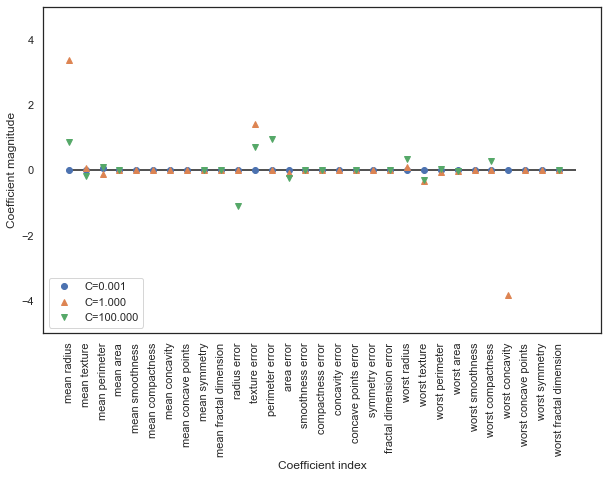

In [21]:
# 使用L1正则化的系数图像和分类精度:
plt.figure(figsize = (10, 6))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr = LogisticRegression(solver = "liblinear", C=C, penalty="l1")
    lr_l1 = lr.fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))   
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), 
           cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

用于二分类的线性模型与用于回归的线性模型有许多相似之处。与用于回归的线性模型一样，模型的主要差别在于penalty参数，这个参数会影响正则化，也会影响模型是使用所有可用特征还是只选择特征的一个子集。